# Traffic Sign Classifier Using Convolutional Neural Networks
---
In this project, we leverage the power of Convolutional Neural Networks (CNNs) using Keras and TensorFlow to develop a robust traffic sign classification model. The dataset we employ is sourced from Kaggle and contains various traffic signs commonly found in Germany.

The primary objective of this model is to accurately classify traffic signs, which holds significant potential for enhancing the capabilities of autonomous vehicles and improving overall road safety.

# 1. Finding and Loading data from Kaggle

In [1]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2) (1).json


{'kaggle (2) (1).json': b'{"username":"omaralqarsh111","key":"e1d27f04e39c1c0ffcc05aa7f1a98170"}'}

In [2]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
ls


'kaggle (2) (1).json'  'kaggle (2).json'   sample_data/   traffic_sign_dataset/


In [6]:
!mkdir -p ~/.kaggle
!cp 'kaggle (2) (1).json' ~/.kaggle/kaggle.json

In [7]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Creating directory and changing the current working directory
#uncomment the line below if the folder has not been created before
#!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

[Errno 2] No such file or directory: 'traffic_sign_dataset'
/content/traffic_sign_dataset


In [10]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          99806       1062  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          13072        277  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            502         30  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [11]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 611M/612M [00:08<00:00, 181MB/s]
100% 612M/612M [00:08<00:00, 75.1MB/s]
/content


In [12]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

# 2. Preprocessing the images and visualizing them  

In [13]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

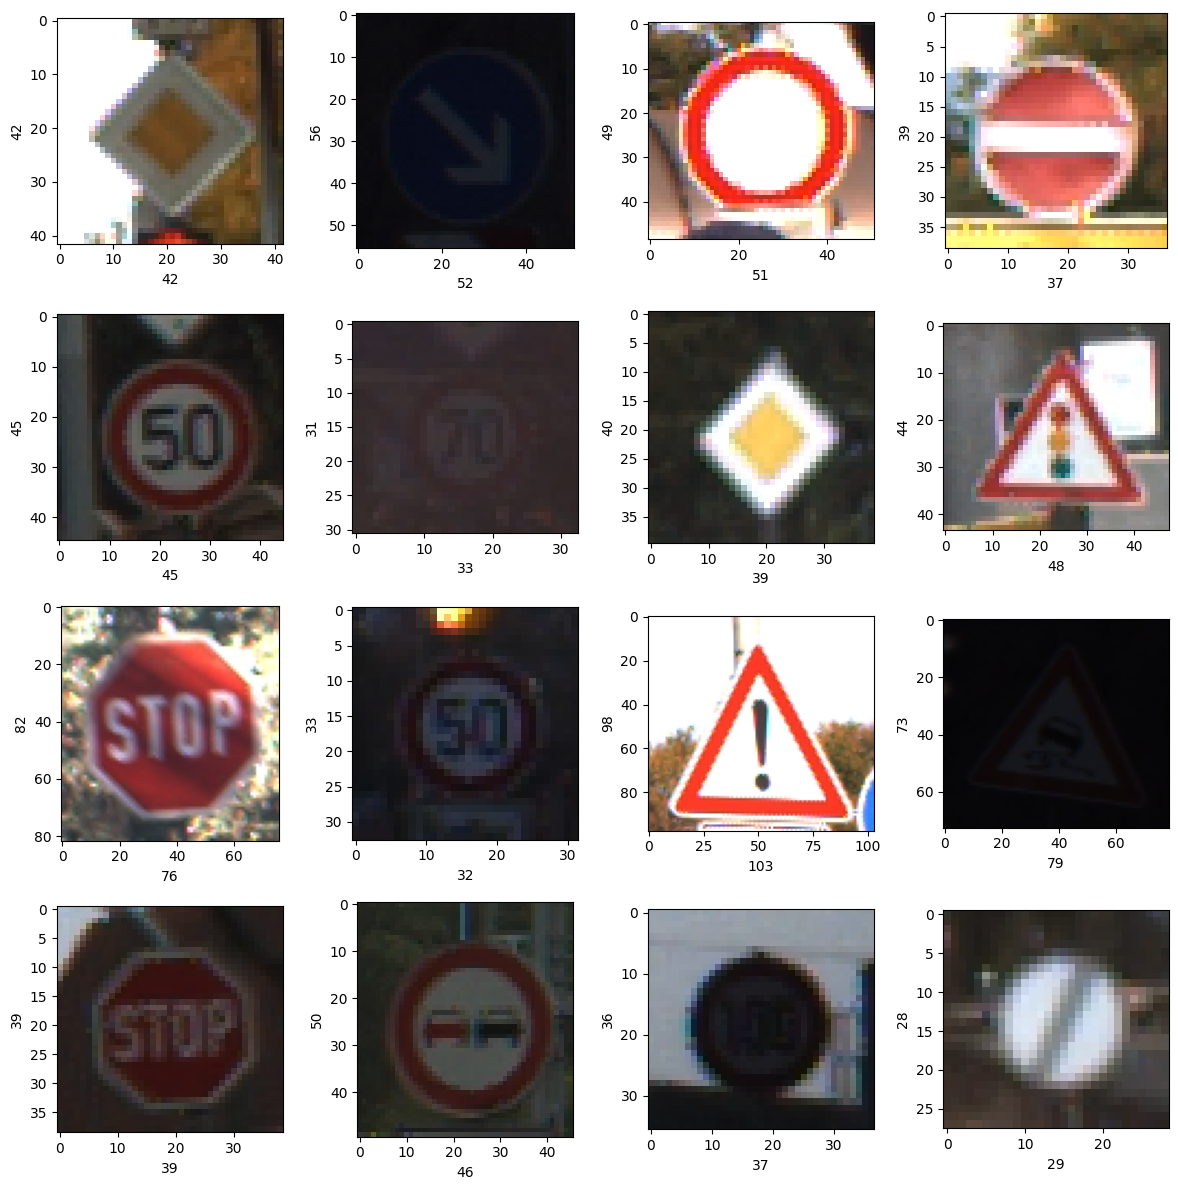

In [15]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

# 3.Finding th mean of the dimensions and resizing all images accordingly

In [16]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [17]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [18]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

# 4. Converting images to np array and normalizing them

In [19]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [20]:
label_id = np.array(label_id)
label_id.shape

(39209,)

# 5. Checking for class imbalance

In [21]:
images.shape

(39209, 50, 50, 3)

In [22]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

# 6. Splitting the data

In [23]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [24]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# 7. Creating the model Architecture, Compiling the model, and Fittinng the model

In [25]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [27]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 262s - loss: 2.5825 - accuracy: 0.2900 - val_loss: 1.4769 - val_accuracy: 0.6117 - 262s/epoch - 1s/step
Epoch 2/10
246/246 - 246s - loss: 1.3272 - accuracy: 0.5875 - val_loss: 0.5828 - val_accuracy: 0.8717 - 246s/epoch - 1s/step
Epoch 3/10
246/246 - 241s - loss: 0.8431 - accuracy: 0.7314 - val_loss: 0.3340 - val_accuracy: 0.9268 - 241s/epoch - 979ms/step
Epoch 4/10
246/246 - 242s - loss: 0.6495 - accuracy: 0.7908 - val_loss: 0.2526 - val_accuracy: 0.9575 - 242s/epoch - 984ms/step
Epoch 5/10
246/246 - 250s - loss: 0.5465 - accuracy: 0.8229 - val_loss: 0.1894 - val_accuracy: 0.9675 - 250s/epoch - 1s/step
Epoch 6/10
246/246 - 247s - loss: 0.4745 - accuracy: 0.8400 - val_loss: 0.1499 - val_accuracy: 0.9716 - 247s/epoch - 1s/step
Epoch 7/10
246/246 - 240s - loss: 0.4212 - accuracy: 0.8620 - val_loss: 0.1240 - val_accuracy: 0.9802 - 240s/epoch - 977ms/step
Epoch 8/10
246/246 - 241s - loss: 0.3989 - accuracy: 0.8697 - val_loss: 0.1017 - val_accuracy: 0.9838 - 241s/epoch -

# 8. Evaluating the model

<Axes: >

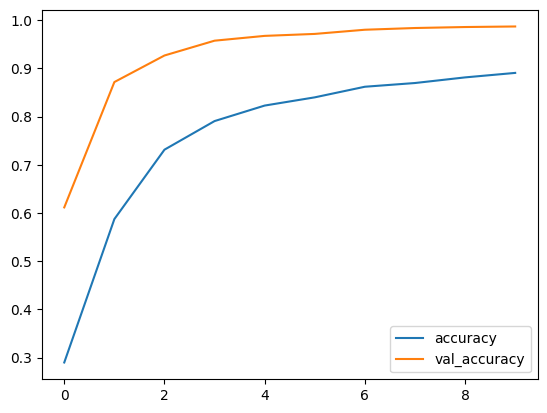

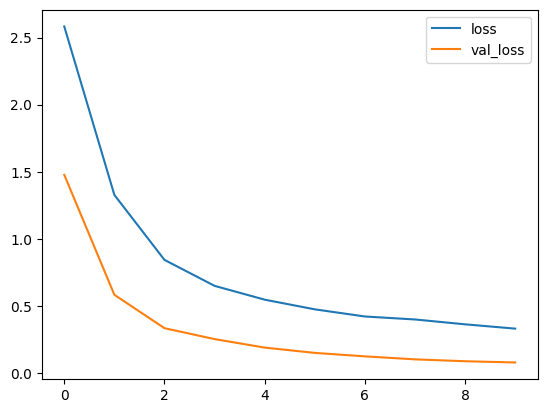

In [28]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

# 8. Predicting using the test data

In [29]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [30]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [31]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [32]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [35]:
y_pred_probabilities = model.predict(test_images)
y_pred = y_pred_probabilities.argmax(axis=-1)
y_pred

395/395 [==============================] - 22s 55ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [36]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

# 9. Visualizing the original label vs predicted label

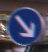

In [48]:

# Visualize test image
img = Image.open(test_path + '/00002.png')
img

In [47]:
# Original label
print("Original label : ",all_lables[y_test[2]])


Original label :  Keep right


In [46]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[2]])

Predicted label :  Keep right


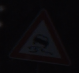

In [50]:

# Visualize test image
img = Image.open(test_path + '/00012.png')
img

In [ ]:
# Original label
print("Original label : ",all_lables[y_test[12]])


In [51]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[12]])


Predicted label :  Slippery road
